In [221]:
# Enter your code here, printing relevant answers to console:
import pandas as pd  #Importing pandas library
# Enter your code here, printing relevant answers to console:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from pandas_datareader import data
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [8]:
tweetsDf = pd.read_csv("data/tweets_full.csv", sep = ";") 
tweetsDf = tweetsDf.set_index('id')

In [9]:
tweetsDf

,created_at,full_text
id,,
1,2020-04-09 23:59:51+00:00,@KennyDegu very very little volume. With $10T ...
2,2020-04-09 23:58:55+00:00,#ES_F achieved Target 2780 closing above 50% #...
3,2020-04-09 23:58:52+00:00,RT @KimbleCharting: Silver/Gold indicator crea...
4,2020-04-09 23:58:27+00:00,@Issaquahfunds Hedged our $MSFT position into ...
5,2020-04-09 23:57:59+00:00,RT @zipillinois: 3 Surprisingly Controversial ...
...,...,...
938668,2020-07-16 00:00:25+00:00,RT @MadMraket: We tend to spend lot of time in...
938669,2020-07-16 00:00:23+00:00,You \n\n$SPX $SPY #ES_F
938670,2020-07-16 00:00:23+00:00,"$KO Coca-Cola #Options #maxpain Chart, Open In..."


In [10]:
tweetsDf['created_at']=pd.to_datetime(tweetsDf['created_at'])


In [11]:
tweetsDf.describe()

C:\Users\ilaks\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,created_at,full_text
count,923673,923673
unique,829053,677585
top,2020-06-29 02:00:04+00:00,"RT @ChrisDungeon: ""Innovation has nothing to d..."
freq,22,1677
first,2020-04-09 00:00:01+00:00,NaN
last,2020-07-16 23:59:13+00:00,NaN


In [41]:
amazonTweets=pd.DataFrame()
microsoftTweets=pd.DataFrame()
appleTweets=pd.DataFrame()
teslaTweets=pd.DataFrame()
amdTweets=pd.DataFrame()

for index,row in tweetsDf.iterrows():
    tempRow=row
    if any(x in row['full_text'].lower() for x in ['amazon','amzn']):
        tempRow['company']='AMZN' 
        amazonTweets=amazonTweets.append(tempRow)
    if any(x in row['full_text'].lower() for x in ['microsoft','msft']):
        tempRow['company']='MSFT'
        microsoftTweets=microsoftTweets.append(tempRow)
    if any(x in row['full_text'].lower() for x in ['apple','aapl']):
        tempRow['company']='AAPL'
        appleTweets=appleTweets.append(tempRow)
    if any(x in row['full_text'].lower() for x in ['tesla','tsla']):
        tempRow['company']='TSLA'
        teslaTweets=teslaTweets.append(tempRow)
    if any(x in row['full_text'].lower() for x in ['advanced micro devices','amd']):
        tempRow['company']='AMD'
        amdTweets=amdTweets.append(tempRow)
        
    

In [49]:
frames = [amazonTweets, microsoftTweets, appleTweets,teslaTweets,amdTweets]
filteredTweets = pd.concat(frames)

In [85]:
filteredTweets

,company,created_at,full_text,PolarityScores,PositiveScore,NegativeScore,NeutralScore,CompoundScore,SentimentClass
19,AMZN,2020-04-09 23:55:42+00:00,Treasury Secretary Mnuchin says US could be op...,"{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,0.000,0.927,0.2023,positive
33,AMZN,2020-04-09 23:54:47+00:00,This week's Expired Signals are now published ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
139,AMZN,2020-04-09 23:36:09+00:00,Dow gains 285 points to cap epic rally $AAPL $...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.146,0.000,0.854,0.3400,positive
156,AMZN,2020-04-09 23:33:41+00:00,Valorant breaks $AMZN's Twitch single-day view...,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",0.000,0.118,0.882,-0.5574,negative
271,AMZN,2020-04-09 23:14:09+00:00,Bill Gates says US government cant wave a wand...,"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.079,0.000,0.921,0.3612,positive
...,...,...,...,...,...,...,...,...,...
938618,AMD,2020-07-16 00:05:54+00:00,"Trading Summary - July 15, 2020\n\n7 Trades - ...","{'neg': 0.052, 'neu': 0.878, 'pos': 0.071, 'co...",0.071,0.052,0.878,0.2500,positive
938630,AMD,2020-07-16 00:04:48+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
938631,AMD,2020-07-16 00:04:42+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
938633,AMD,2020-07-16 00:04:31+00:00,"About an hour left before the ""Mid-week chart ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral


In [86]:
filteredTweets.to_csv('data/filteredComp.csv',sep='|')

## Sentiment Analysis using VADAR
Vadar is short for Valence Aware dictionary and sEntiment reasoner. Vadar identified as lexicon and rule based sentiment analysis tool used to analyze the sentiment of a text. Lexicon is a list of lexical feaures (words) which are labeled with positive or negtive based on semantic meaning.The focus on this notebook not determine if a sentence is objective or subjective, fact or opinion but only focusing on wether the text express positive or negative.

In [57]:
vader_analyzer = SentimentIntensityAnalyzer()
def getPolarityScores(text):
    stats=vader_analyzer.polarity_scores(text)
    return stats

In [59]:
filteredTweets['PolarityScores']=filteredTweets['full_text'].apply(getPolarityScores)

In [62]:
def getSentimentClass(stats):
    if stats['compound'] >= 0.05 : 
        return 'positive'
  
    elif stats['compound'] <= - 0.05 : 
        return 'negative'
        
    else : 
        return 'neutral'  

In [63]:
filteredTweets['PolarityScores']

19        {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...
33        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
139       {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...
156       {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...
271       {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...
                                ...                        
938618    {'neg': 0.052, 'neu': 0.878, 'pos': 0.071, 'co...
938630    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
938631    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
938633    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
938662    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: PolarityScores, Length: 378454, dtype: object

In [64]:
filteredTweets['PositiveScore']=filteredTweets['PolarityScores'].apply(lambda x:x['pos'])
filteredTweets['NegativeScore']=filteredTweets['PolarityScores'].apply(lambda x:x['neg'])
filteredTweets['NeutralScore']=filteredTweets['PolarityScores'].apply(lambda x:x['neu'])
filteredTweets['CompoundScore']=filteredTweets['PolarityScores'].apply(lambda x:x['compound'])
filteredTweets['SentimentClass']=filteredTweets['PolarityScores'].apply(getSentimentClass)

In [65]:
filteredTweets

,company,created_at,full_text,PolarityScores,PositiveScore,NegativeScore,NeutralScore,CompoundScore,SentimentClass
19,AMZN,2020-04-09 23:55:42+00:00,Treasury Secretary Mnuchin says US could be op...,"{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,0.000,0.927,0.2023,positive
33,AMZN,2020-04-09 23:54:47+00:00,This week's Expired Signals are now published ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
139,AMZN,2020-04-09 23:36:09+00:00,Dow gains 285 points to cap epic rally $AAPL $...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.146,0.000,0.854,0.3400,positive
156,AMZN,2020-04-09 23:33:41+00:00,Valorant breaks $AMZN's Twitch single-day view...,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",0.000,0.118,0.882,-0.5574,negative
271,AMZN,2020-04-09 23:14:09+00:00,Bill Gates says US government cant wave a wand...,"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.079,0.000,0.921,0.3612,positive
...,...,...,...,...,...,...,...,...,...
938618,AMD,2020-07-16 00:05:54+00:00,"Trading Summary - July 15, 2020\n\n7 Trades - ...","{'neg': 0.052, 'neu': 0.878, 'pos': 0.071, 'co...",0.071,0.052,0.878,0.2500,positive
938630,AMD,2020-07-16 00:04:48+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
938631,AMD,2020-07-16 00:04:42+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
938633,AMD,2020-07-16 00:04:31+00:00,"About an hour left before the ""Mid-week chart ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral


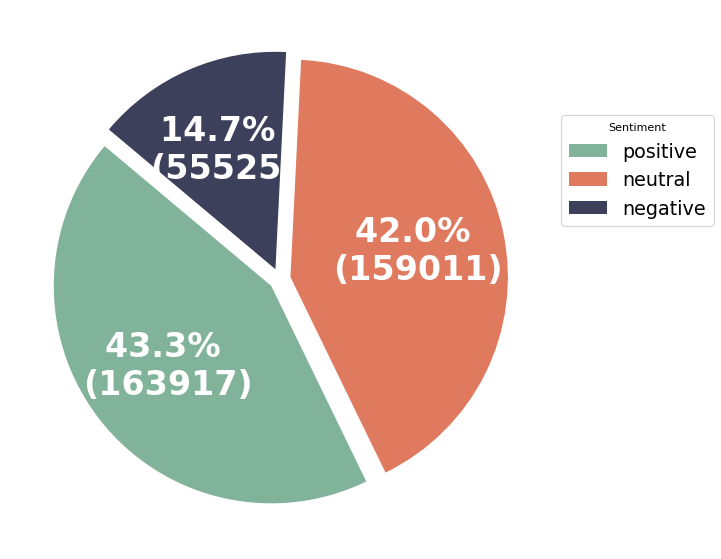

In [68]:
y = filteredTweets['SentimentClass'].value_counts()
mylabels = y.index

fig, ax = plt.subplots(figsize=(24, 9), subplot_kw=dict(aspect="equal"), dpi= 80)
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% \n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(y, 
                                  autopct=lambda pct: func(pct, y),
                                  textprops=dict(color="w"), 
                                  colors=['#81b29a', '#e07a5f', '#3d405b'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, mylabels, title="Sentiment", loc="center left",fontsize= 'xx-large' ,bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=30, weight=700)
#ax.set_title("Number of News by Sentiment", fontsize=18, fontweight="bold")
plt.show()

In [73]:
df_sentiment = filteredTweets.pivot_table(index='company',columns='SentimentClass',aggfunc='size')

In [92]:
df_sentiment

SentimentClass,negative,neutral,positive
company,,,
AAPL,19827,54225,52311
AMD,1904,8437,8950
AMZN,16701,43081,50396
MSFT,8423,28632,24731
TSLA,8670,24637,27529


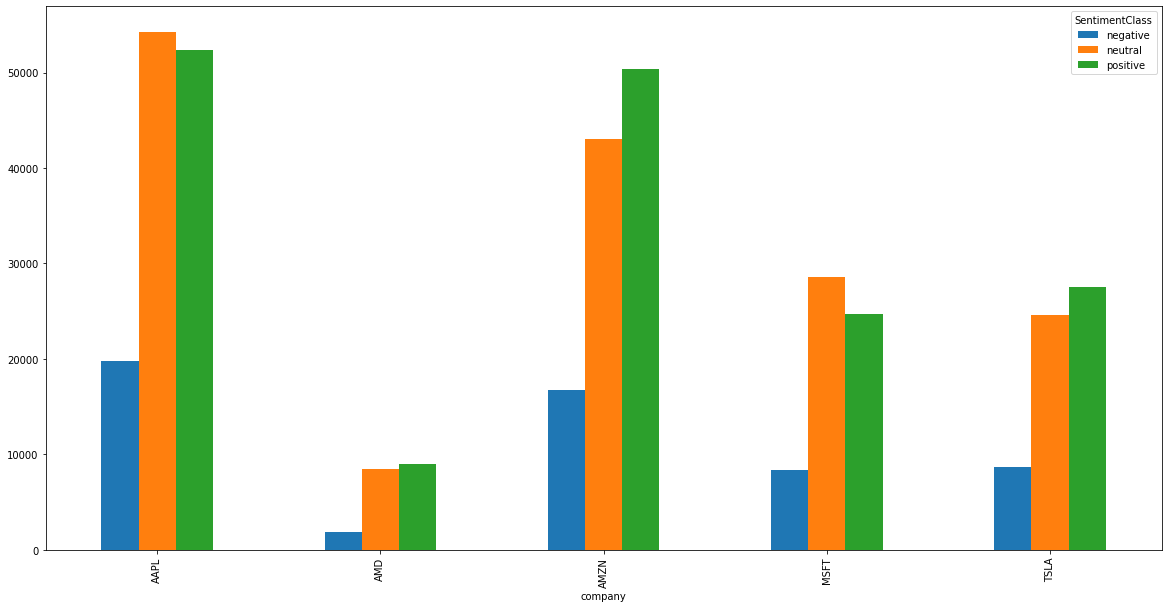

In [79]:
df_sentiment.plot(kind = 'bar',figsize=(20, 10))
plt.show()

In [80]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk_stopwords = nltk.corpus.stopwords.words('english')


#Initializing TweetTokenizer
tk=TweetTokenizer()


#Converting the dataframe to a list
tweetlist = pd.Series.tolist(filteredTweets['full_text'])

#lowecasing the tweets
lowertweetlist=[tweet.lower() for tweet in tweetlist ]

allTokens=[]

import re

def alpha_filter(w):
    # pattern to match a word of non-alphabetical characters
    pattern = re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

# tokenizing the lowertweets and storing tokens into the flat list allTokens
for tweet in lowertweetlist:
    tweetTokens = tk.tokenize(tweet)
    tweetTokens = [tok for tok in tweetTokens if not tok in nltk_stopwords]
    tweetTokens = [tok for tok in tweetTokens if not alpha_filter(tok)]
    allTokens.extend(tweetTokens)

In [83]:
from nltk import FreqDist
ndist = FreqDist(allTokens)
feqWords = ndist.most_common(50)
feqWords

[('aapl', 241757),
 ('amzn', 221919),
 ('tsla', 153512),
 ('msft', 151198),
 ('rt', 129096),
 ('fb', 115939),
 ('spy', 115052),
 ('nflx', 84963),
 ('qqq', 74796),
 ('ba', 64743),
 ('amd', 61735),
 ('googl', 58244),
 ('nvda', 49419),
 ('spx', 46162),
 ('goog', 44939),
 ('#stocks', 33423),
 ('twtr', 32818),
 ('baba', 30512),
 ('roku', 29958),
 ('btc', 28916),
 ('shop', 27333),
 ('today', 26884),
 ('zm', 26881),
 ('market', 25820),
 ('apple', 25522),
 ('dis', 23254),
 ('#stockmarket', 23235),
 ('jpm', 23079),
 ('stocks', 23020),
 ('iwm', 22953),
 ('stock', 22245),
 ('#investing', 21890),
 ('ge', 21635),
 ('bac', 21191),
 ('week', 21071),
 ('aal', 20901),
 ('amazon', 20306),
 ('#trading', 19668),
 ('bynd', 18751),
 ('day', 18323),
 ('f', 18178),
 ('intc', 17656),
 ('gld', 17548),
 ('eth', 16934),
 ('buy', 16831),
 ('big', 16332),
 ('c', 15914),
 ('wmt', 15699),
 ('like', 15577),
 ('trading', 15574)]

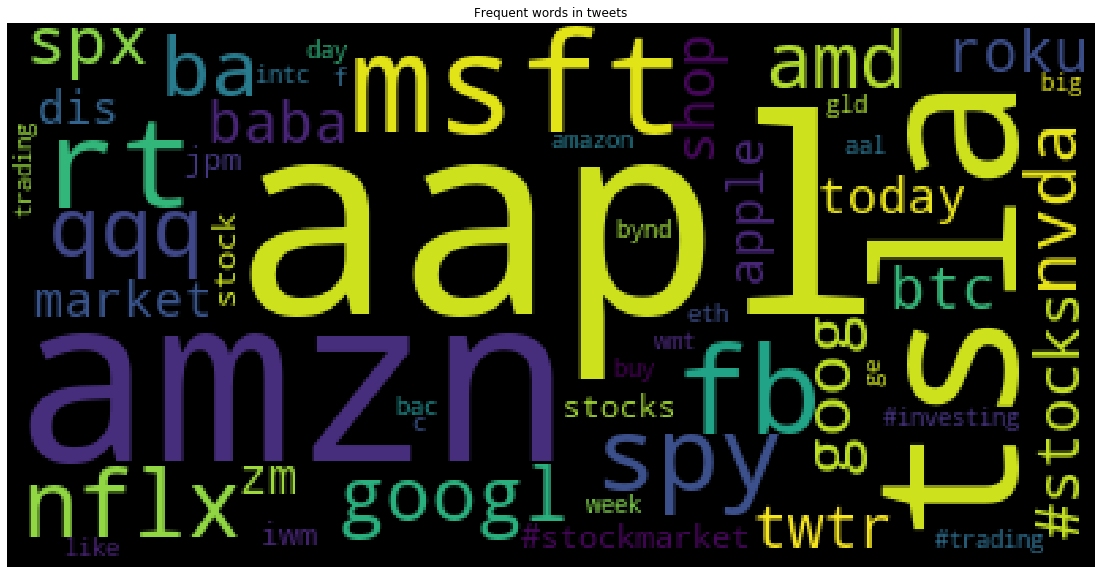

In [84]:
wordcloud = WordCloud().generate_from_frequencies(dict(feqWords))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Frequent words in tweets")
plt.axis('off')
plt.show()  

amazon , amzn
microsoft, msft
apple, aapl
tesla, tsla
advanced micro devices, amd

In [87]:
filteredTweets['date']=filteredTweets['created_at'].dt.date

In [89]:
filteredTweets

,company,created_at,full_text,PolarityScores,PositiveScore,NegativeScore,NeutralScore,CompoundScore,SentimentClass,date
19,AMZN,2020-04-09 23:55:42+00:00,Treasury Secretary Mnuchin says US could be op...,"{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,0.000,0.927,0.2023,positive,2020-04-09
33,AMZN,2020-04-09 23:54:47+00:00,This week's Expired Signals are now published ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2020-04-09
139,AMZN,2020-04-09 23:36:09+00:00,Dow gains 285 points to cap epic rally $AAPL $...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.146,0.000,0.854,0.3400,positive,2020-04-09
156,AMZN,2020-04-09 23:33:41+00:00,Valorant breaks $AMZN's Twitch single-day view...,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",0.000,0.118,0.882,-0.5574,negative,2020-04-09
271,AMZN,2020-04-09 23:14:09+00:00,Bill Gates says US government cant wave a wand...,"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.079,0.000,0.921,0.3612,positive,2020-04-09
...,...,...,...,...,...,...,...,...,...,...
938618,AMD,2020-07-16 00:05:54+00:00,"Trading Summary - July 15, 2020\n\n7 Trades - ...","{'neg': 0.052, 'neu': 0.878, 'pos': 0.071, 'co...",0.071,0.052,0.878,0.2500,positive,2020-07-16
938630,AMD,2020-07-16 00:04:48+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2020-07-16
938631,AMD,2020-07-16 00:04:42+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2020-07-16
938633,AMD,2020-07-16 00:04:31+00:00,"About an hour left before the ""Mid-week chart ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2020-07-16


In [135]:
SentimentCompond=pd.DataFrame({'CompoundScore' : filteredTweets.groupby([ 'date','company'])['CompoundScore'].mean()}).reset_index()

In [136]:
SentimentCompond

,date,company,CompoundScore
0,2020-04-09,AAPL,0.131894
1,2020-04-09,AMD,0.184509
2,2020-04-09,AMZN,0.164886
3,2020-04-09,MSFT,0.114465
4,2020-04-09,TSLA,0.114775
...,...,...,...
380,2020-07-16,AAPL,0.141100
381,2020-07-16,AMD,0.217304
382,2020-07-16,AMZN,0.153481
383,2020-07-16,MSFT,0.159503


In [137]:
SentimentCompond = SentimentCompond.pivot(index='date', columns='company', values='CompoundScore')

In [138]:
SentimentCompond

company,AAPL,AMD,AMZN,MSFT,TSLA
date,,,,,
2020-04-09,0.131894,0.184509,0.164886,0.114465,0.114775
2020-04-10,0.159804,0.167707,0.189141,0.100198,0.115593
2020-04-11,0.039595,0.161654,0.012753,0.177521,0.152895
2020-04-12,0.078092,0.159828,0.068979,0.161077,0.191805
2020-04-13,0.149258,0.259793,0.153679,0.078948,0.177561
...,...,...,...,...,...
2020-07-12,0.186293,0.194087,0.148767,0.126246,0.147246
2020-07-13,0.153752,0.258105,0.137691,0.143531,0.166206
2020-07-14,0.154269,0.180890,0.163582,0.125609,0.144266


In [139]:
start_date=SentimentCompond.index[0]
end_date=SentimentCompond.index[-1]
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
print(all_weekdays)

DatetimeIndex(['2020-04-09', '2020-04-10', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-15',
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
      

In [140]:
SentimentCompond = SentimentCompond.reindex(all_weekdays)
SentimentCompond = SentimentCompond.fillna(method='ffill')

In [141]:
SentimentCompond

company,AAPL,AMD,AMZN,MSFT,TSLA
2020-04-09,0.131894,0.184509,0.164886,0.114465,0.114775
2020-04-10,0.159804,0.167707,0.189141,0.100198,0.115593
2020-04-13,0.149258,0.259793,0.153679,0.078948,0.177561
2020-04-14,0.200569,0.195394,0.133326,0.163726,0.255776
2020-04-15,0.191912,0.167479,0.146791,0.188192,0.186257
...,...,...,...,...,...
2020-07-10,0.188773,0.290578,0.172387,0.152848,0.197578
2020-07-13,0.153752,0.258105,0.137691,0.143531,0.166206
2020-07-14,0.154269,0.180890,0.163582,0.125609,0.144266
2020-07-15,0.176212,0.223387,0.163820,0.117075,0.151629


In [142]:
msftSent = SentimentCompond.loc[:, 'MSFT']
amznSent = SentimentCompond.loc[:, 'AMZN']
tslaSent = SentimentCompond.loc[:, 'TSLA']
aaplSent = SentimentCompond.loc[:, 'AAPL']
amdSent = SentimentCompond.loc[:, 'AMD']

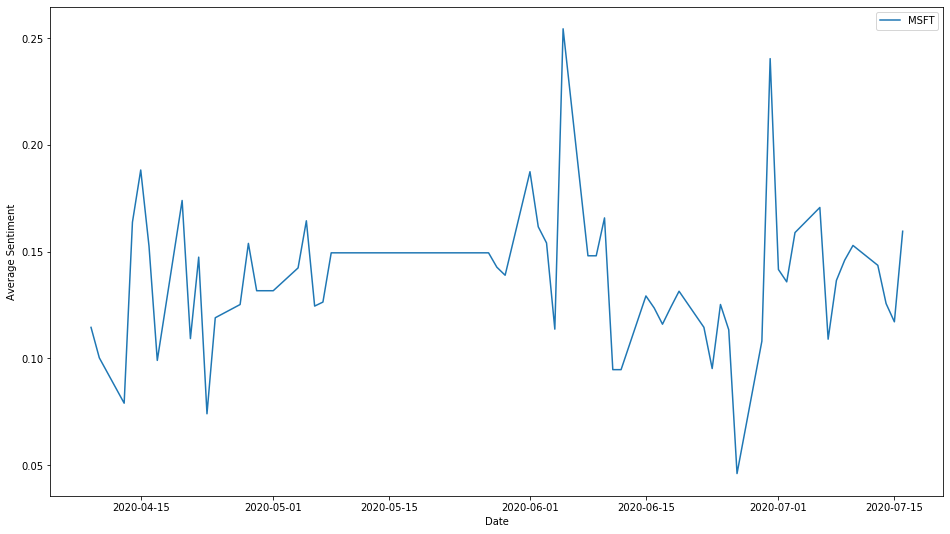

In [143]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(msftSent.index,msftSent, label='MSFT')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.legend()

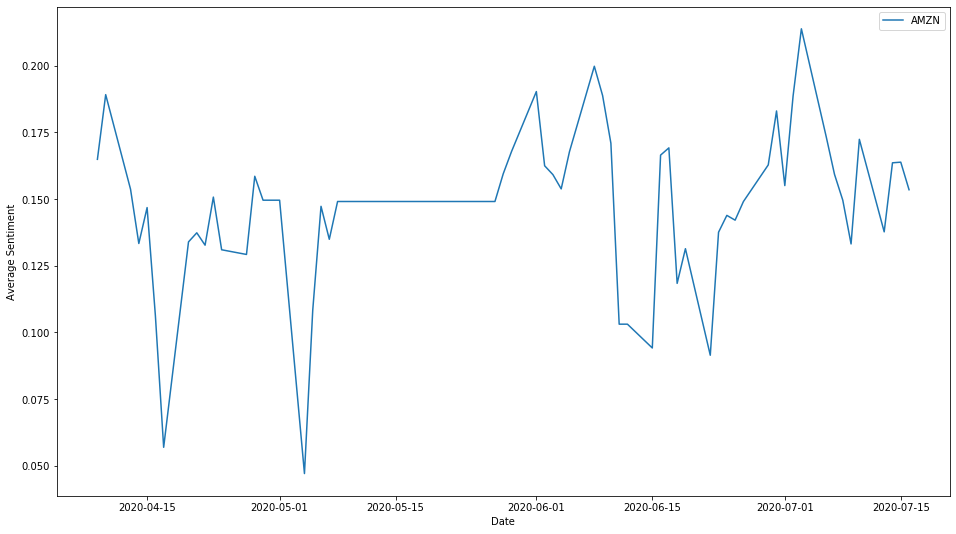

In [144]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amznSent.index,amznSent, label='AMZN')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.legend()

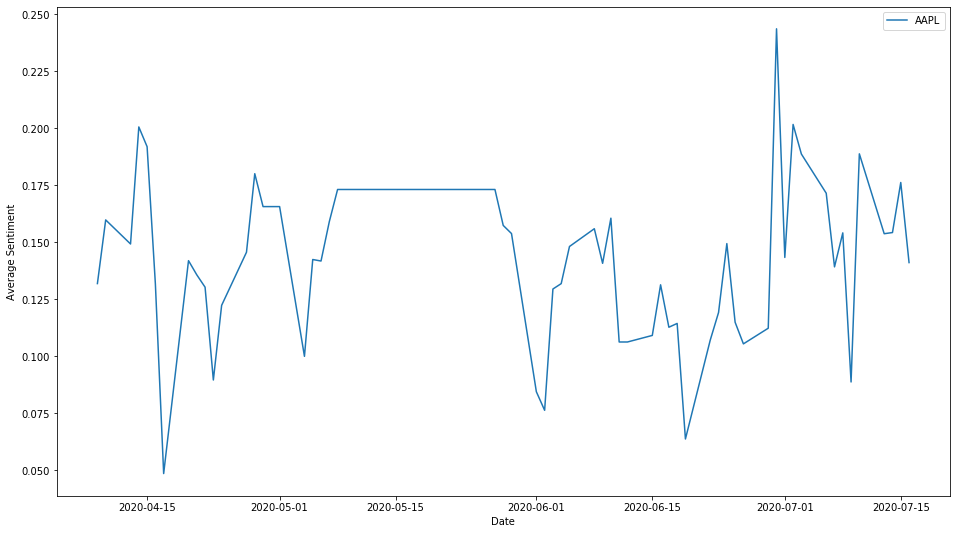

In [145]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(aaplSent.index,aaplSent, label='AAPL')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.legend()

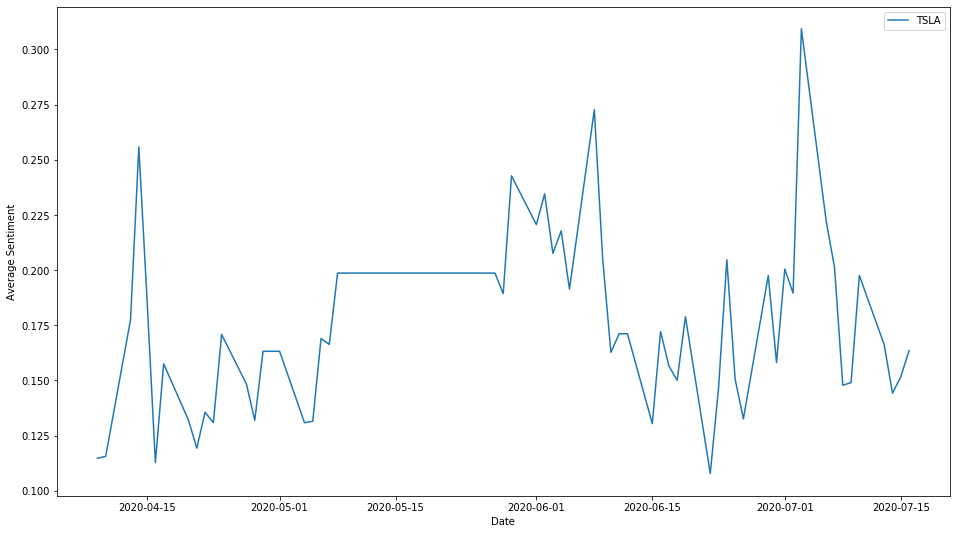

In [146]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(tslaSent.index,tslaSent, label='TSLA')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.legend()

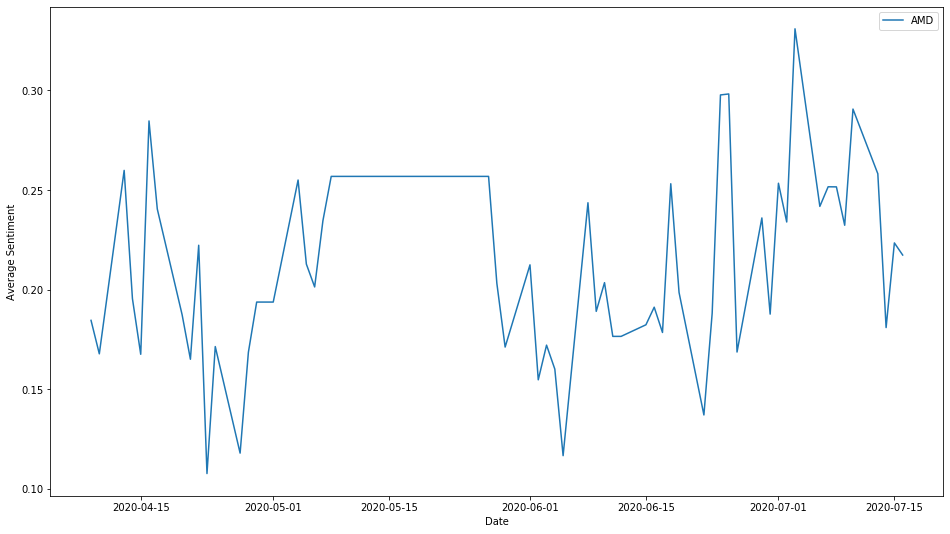

In [147]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amdSent.index,amdSent, label='AMD')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.legend()

## Financial Stock Data

In [149]:
# Define the instruments to download. We would like to see 5 companies like Apple, Microsoft,etc.
tickers = ['AMZN', 'TSLA', 'MSFT','AAPL', 'AMD']
# We would like all available data from 04/09/2020 until 7/16/2020.
start_date = '2020-04-09'
end_date = '2020-07-16'
# User pandas_reader.data.DataReader to load the desired data from yahoo finance. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo',start_date, end_date)

In [150]:
panel_data

Attributes    Adj Close                                                \
Symbols            AMZN        TSLA        MSFT       AAPL        AMD   
Date                                                                    
2020-04-09  2042.760010  114.599998  163.102097  66.369415  48.380001   
2020-04-13  2168.870117  130.190002  163.467514  67.672096  50.939999   
2020-04-14  2283.320068  141.977997  171.556458  71.089745  54.930000   
2020-04-15  2307.679932  145.966003  169.758926  70.440895  54.990002   
2020-04-16  2408.189941  149.042007  174.855240  71.000603  56.950001   
...                 ...         ...         ...        ...        ...   
2020-07-10  3200.000000  308.929993  211.620972  95.278015  55.880001   
2020-07-13  3104.000000  299.411987  205.084259  94.838470  53.590000   
2020-07-14  3084.000000  303.359985  206.351974  96.407898  54.720001   
2020-07-15  3008.870117  309.201996  206.044937  97.070930  55.340000   
2020-07-16  2999.899902  300.127991  201.964462  95.876472  54.919998   

Attributes        Close                                                ...  \
Symbols            AMZN        TSLA        MSFT       AAPL        AMD  ...   
Date                                                                   ...   
2020-04-09  2042.760010  114.599998  165.139999  66.997498  48.380001  ...   
2020-04-13  2168.870117  130.190002  165.509995  68.312500  50.939999  ...   
2020-04-14  2283.320068  141.977997  173.699997  71.762497  54.930000  ...   
2020-04-15  2307.679932  145.966003  171.880005  71.107498  54.990002  ...   
2020-04-16  2408.189941  149.042007  177.039993  71.672501  56.950001  ...   
...                 ...         ...         ...        ...        ...  ...   
2020-07-10  3200.000000  308.929993  213.669998  95.919998  55.880001  ...   
2020-07-13  3104.000000  299.411987  207.070007  95.477501  53.590000  ...   
2020-07-14  3084.000000  303.359985  208.350006  97.057503  54.720001  ...   
2020-07-15  3008.870117  309.201996  208.039993  97.724998  55.340000  ...   
2020-07-16  2999.899902  300.127991  203.919998  96.522499  54.919998  ...   

Attributes         Open                                                \
Symbols            AMZN        TSLA        MSFT       AAPL        AMD   
Date                                                                    
2020-04-09  2044.300049  112.417999  166.360001  67.175003  49.650002   
2020-04-13  2040.000000  118.031998  164.350006  67.077499  48.470001   
2020-04-14  2200.469971  139.794006  169.000000  70.000000  52.240002   
2020-04-15  2257.679932  148.399994  171.199997  70.599998  53.730000   
2020-04-16  2346.000000  143.388000  174.300003  71.845001  55.959999   
...                 ...         ...         ...        ...        ...   
2020-07-10  3191.760010  279.200012  213.619995  95.334999  57.540001   
2020-07-13  3251.060059  331.799988  214.479996  97.264999  56.680000   
2020-07-14  3089.000000  311.200012  206.130005  94.839996  53.299999   
2020-07-15  3080.229980  308.600006  209.559998  98.989998  54.959999   
2020-07-16  2971.060059  295.432007  205.399994  96.562500  54.680000   

Attributes      Volume                                                     
Symbols           AMZN         TSLA        MSFT         AAPL          AMD  
Date                                                                       
2020-04-09   4646500.0   68250000.0  51385100.0  161834800.0   80270100.0  
2020-04-13   6716700.0  112377000.0  41905300.0  131022800.0   64290100.0  
2020-04-14   8087200.0  152882500.0  52874300.0  194994800.0   85306800.0  
2020-04-15   6866600.0  117885000.0  40940800.0  131154400.0   83814000.0  
2020-04-16  12038200.0  103289500.0  50479600.0  157125200.0  103106500.0  
...                ...          ...         ...          ...          ...  
2020-07-10   5486000.0  116688000.0  26177600.0   90257200.0   59839700.0  
2020-07-13   7720400.0  194927000.0  38135600.0  191649200.0   57741800.0  
2020-07-14   7231900.0  1

In [151]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
adjclose=panel_data.iloc[:, 0:5]
adjclose.head(10)

Attributes    Adj Close                                              
Symbols            AMZN        TSLA        MSFT       AAPL        AMD
Date                                                                 
2020-04-09  2042.760010  114.599998  163.102097  66.369415  48.380001
2020-04-13  2168.870117  130.190002  163.467514  67.672096  50.939999
2020-04-14  2283.320068  141.977997  171.556458  71.089745  54.930000
2020-04-15  2307.679932  145.966003  169.758926  70.440895  54.990002
2020-04-16  2408.189941  149.042007  174.855240  71.000603  56.950001
2020-04-17  2375.000000  150.778000  176.395996  70.037216  56.599998
2020-04-20  2393.610107  149.272003  172.899673  68.583473  56.970001
2020-04-21  2328.120117  137.343994  165.749039  66.463539  52.919998
2020-04-22  2363.489990  146.421997  171.378693  68.377922  55.919998
2020-04-23  2399.449951  141.126007  169.304611  68.112923  55.900002

In [152]:
# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
adjclose = adjclose.reindex(all_weekdays)

In [153]:
# Reindexing will insert missing values (NaN) for the dates that were not present in the original set. To cope with this, we can fill the missing by replacing them with the latest available price for each instrument.
adjclose = adjclose.fillna(method='ffill')

In [154]:
adjclose.head(10)

Attributes    Adj Close                                              
Symbols            AMZN        TSLA        MSFT       AAPL        AMD
2020-04-09  2042.760010  114.599998  163.102097  66.369415  48.380001
2020-04-10  2042.760010  114.599998  163.102097  66.369415  48.380001
2020-04-13  2168.870117  130.190002  163.467514  67.672096  50.939999
2020-04-14  2283.320068  141.977997  171.556458  71.089745  54.930000
2020-04-15  2307.679932  145.966003  169.758926  70.440895  54.990002
2020-04-16  2408.189941  149.042007  174.855240  71.000603  56.950001
2020-04-17  2375.000000  150.778000  176.395996  70.037216  56.599998
2020-04-20  2393.610107  149.272003  172.899673  68.583473  56.970001
2020-04-21  2328.120117  137.343994  165.749039  66.463539  52.919998
2020-04-22  2363.489990  146.421997  171.378693  68.377922  55.919998

In [156]:
# summy of the values for each company 
adjclose.columns = adjclose.columns.droplevel(-0)
adjclose.describe()

Symbols,AMZN,TSLA,MSFT,AAPL,AMD
count,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2552.898462,186.335295,185.803244,80.853785,53.772535
std,264.166401,47.823967,12.925409,8.903857,1.951618
min,2042.760010,114.599998,163.102097,66.369415,48.380001
25%,2377.805054,156.446007,177.265152,73.227032,52.595001
50%,2460.600098,165.520004,182.400970,79.188927,53.660000
75%,2686.625000,199.521996,195.447571,88.466408,55.080000
max,3200.000000,309.201996,212.264740,97.070930,57.439999


[Text(0.5, 0, 'AMZN'),
 Text(1.5, 0, 'TSLA'),
 Text(2.5, 0, 'MSFT'),
 Text(3.5, 0, 'AAPL'),
 Text(4.5, 0, 'AMD')]

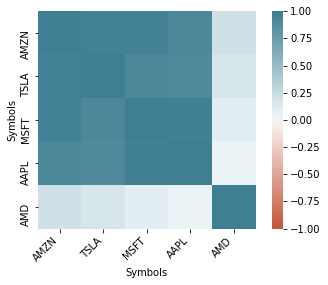

In [168]:
corr = adjclose.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [157]:
# Get the timeseries of each company. This now returns a Pandas Series object indexed by date.
msft = adjclose.loc[:, 'MSFT']
amzn = adjclose.loc[:, 'AMZN']
tsla = adjclose.loc[:, 'TSLA']
aapl = adjclose.loc[:, 'AAPL']
amd = adjclose.loc[:, 'AMD']

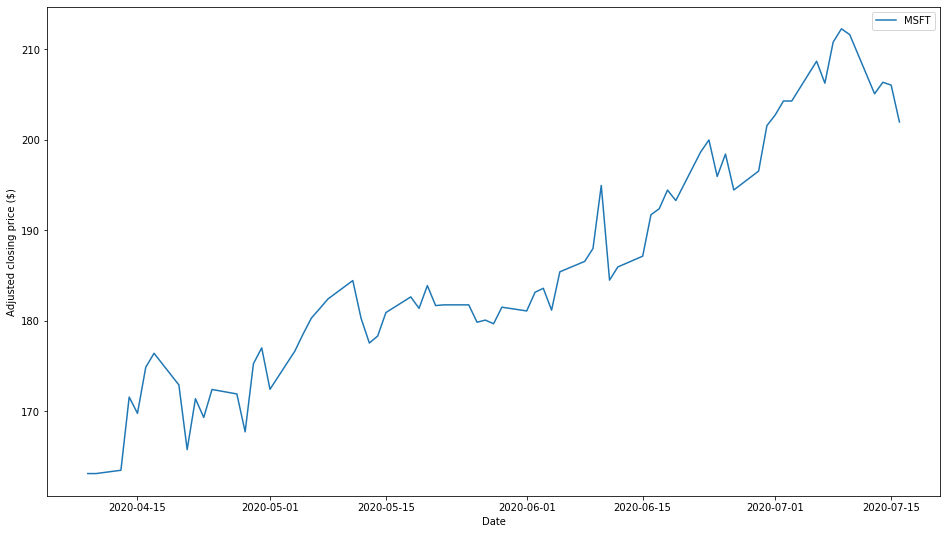

In [159]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(msft.index,msft, label='MSFT')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
plt.show()

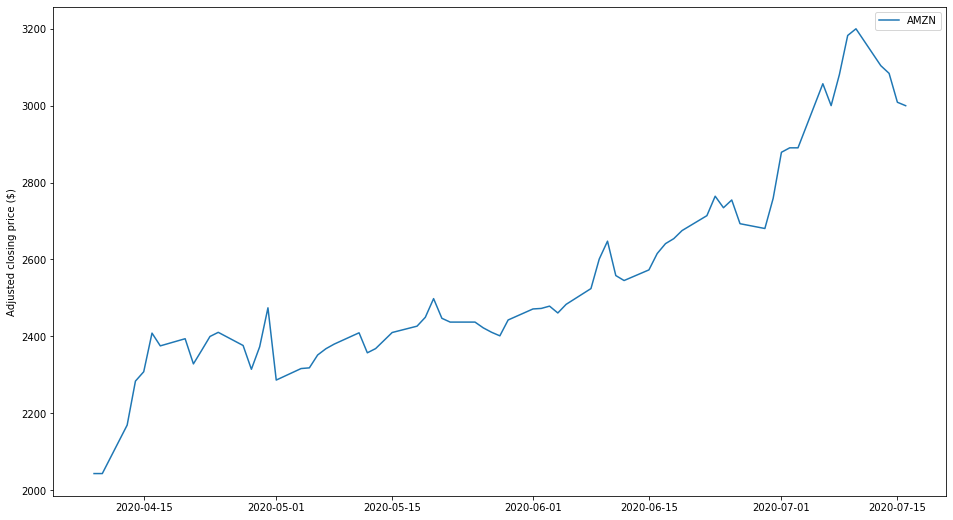

In [163]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amzn.index,amzn, label='AMZN')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
plt.show()

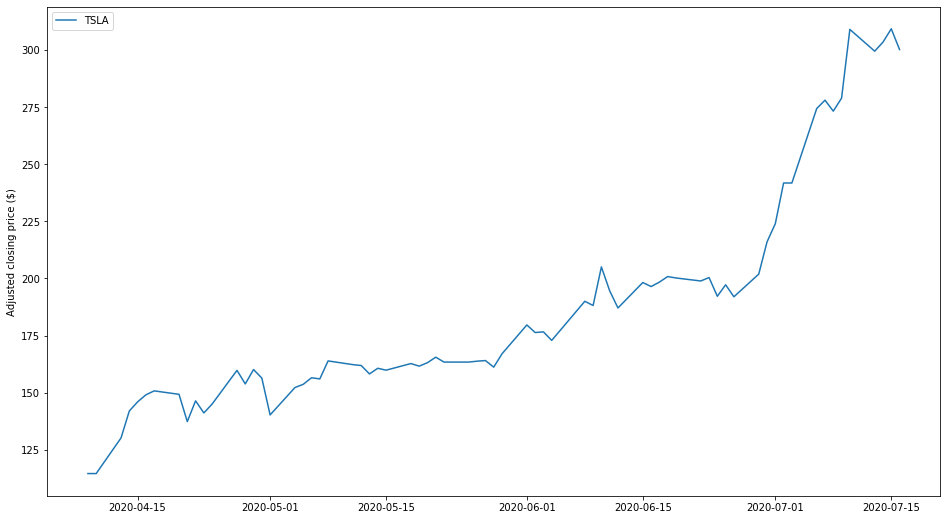

In [164]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(tsla.index,tsla, label='TSLA')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
plt.show()

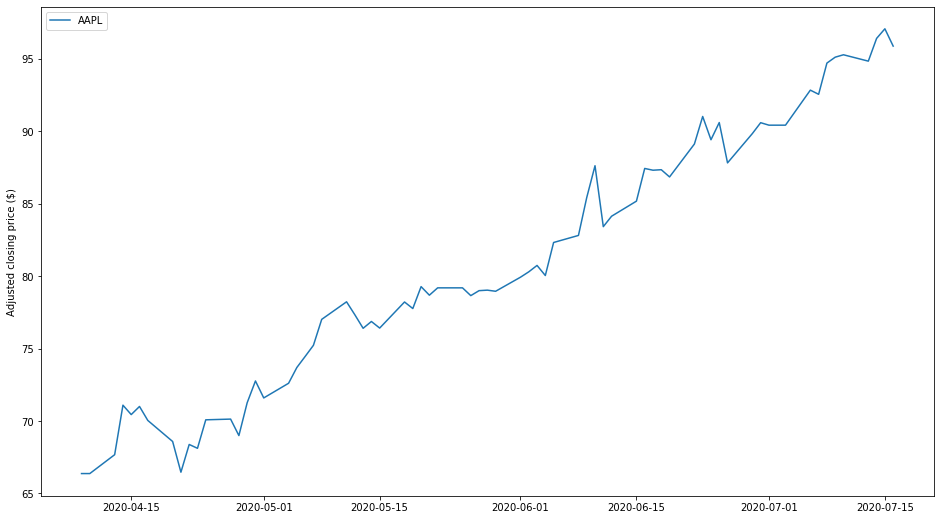

In [165]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(aapl.index,aapl, label='AAPL')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
plt.show()

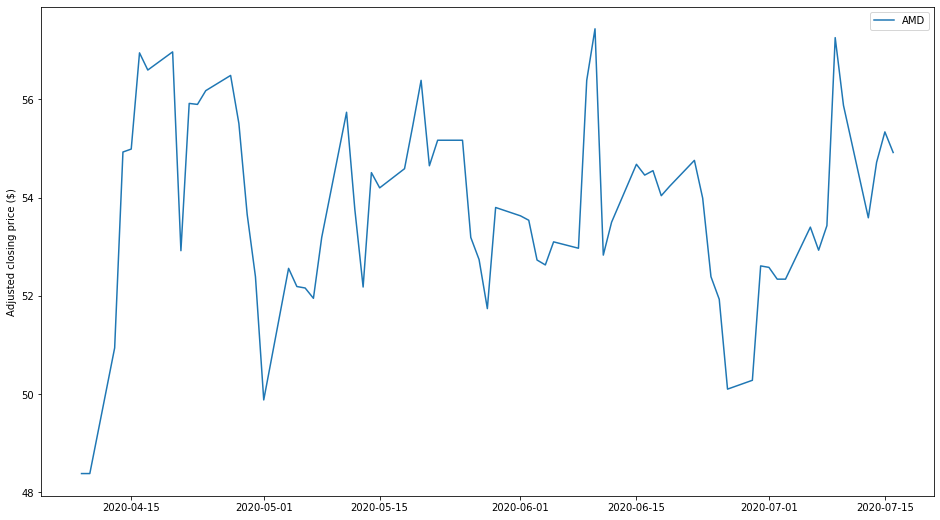

In [167]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amd.index,amd, label='AMD')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
plt.show()

### Correlation between sentiment and Stock price

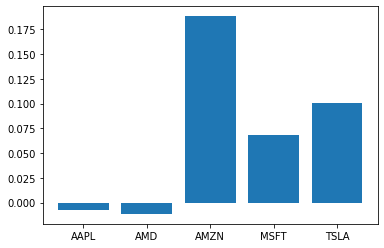

In [172]:
correlations={}
for company in SentimentCompond.columns:
    cor=np.corrcoef(SentimentCompond[company], adjclose[company]   )[0,1]
    correlations[company]=cor
correlations    
#     np.corrcoef(x, y)
names = list(correlations.keys())
values = list(correlations.values())

plt.bar(range(len(correlations)), values, tick_label=names)
plt.show()

####  Taking percentage Change for both close price and sentiment score

In [185]:
sentimentChange=SentimentCompond.pct_change()
sentimentChange

company,AAPL,AMD,AMZN,MSFT,TSLA
2020-04-09,NaN,NaN,NaN,NaN,NaN
2020-04-10,0.211613,-0.091066,0.147103,-0.124647,0.007128
2020-04-13,-0.065997,0.549089,-0.187491,-0.212074,0.536090
2020-04-14,0.343774,-0.247885,-0.132439,1.073847,0.440495
2020-04-15,-0.043159,-0.142865,0.100996,0.149430,-0.271796
...,...,...,...,...,...
2020-07-10,1.126842,0.251128,0.294615,0.047242,0.325810
2020-07-13,-0.185520,-0.111753,-0.201267,-0.060951,-0.158782
2020-07-14,0.003365,-0.299160,0.188036,-0.124867,-0.132008
2020-07-15,0.142237,0.234928,0.001456,-0.067943,0.051038


In [187]:
adjcloseChange= adjclose.pct_change()
adjcloseChange

Symbols,AMZN,TSLA,MSFT,AAPL,AMD
2020-04-09,NaN,NaN,NaN,NaN,NaN
2020-04-10,0.000000,0.000000,0.000000,0.000000,0.000000
2020-04-13,0.061735,0.136038,0.002240,0.019628,0.052914
2020-04-14,0.052769,0.090545,0.049483,0.050503,0.078327
2020-04-15,0.010669,0.028089,-0.010478,-0.009127,0.001092
...,...,...,...,...,...
2020-07-10,0.005458,0.107848,-0.003033,0.001749,-0.024101
2020-07-13,-0.030000,-0.030810,-0.030889,-0.004613,-0.040981
2020-07-14,-0.006443,0.013186,0.006181,0.016548,0.021086
2020-07-15,-0.024361,0.019258,-0.001488,0.006877,0.011330


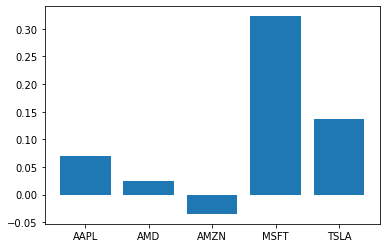

In [189]:
correlations={}
for company in SentimentCompond.columns:
    cor=np.corrcoef(sentimentChange[1:][company], adjcloseChange[company][1:]  )[0,1]
    correlations[company]=cor
correlations    
#     np.corrcoef(x, y)
names = list(correlations.keys())
values = list(correlations.values())

plt.bar(range(len(correlations)), values, tick_label=names)
plt.show()

### Taking 1 day lag

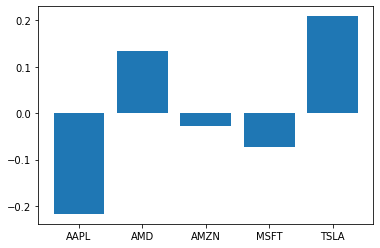

In [197]:
correlations={}
for company in SentimentCompond.columns:
    cor=np.corrcoef(sentimentChange[1:-1][company], adjcloseChange[company][2:]  )[0,1]
    correlations[company]=cor
correlations    
#     np.corrcoef(x, y)
names = list(correlations.keys())
values = list(correlations.values())

plt.bar(range(len(correlations)), values, tick_label=names)
plt.show()

## Stock price prediction with the help of both Sentiment score and previous prices

This is a type of multivariate time series analysis.We generally use multivariate time series analysis to model and explain the interesting interdependencies and co-movements among the variables. we apply a multivariate time series method, called `Vector Auto Regression (VAR)` on this dataset.

<b>Vector Auto Regression (VAR)</b>
VAR model is a stochastic process that represents a group of time-dependent variables as a linear function of their own past values and the past values of all the other variables in the group.

## Stationary Test
Before applying VAR, both the time series variable should be stationary. Both the series are not stationary since both the series do not show constant mean and variance over time. We can also perform a statistical test like the Augmented Dickey-Fuller test (ADF) to find stationarity of the series using the AIC criteria.

In [205]:
from statsmodels.tsa.stattools import adfuller
for company in SentimentCompond.columns:
    adfuller_test = adfuller(adjclose[company], autolag= "AIC")
    print(company)
    print("ADF test statistic: {}".format(adfuller_test[0]))
    print("p-value: {}".format(adfuller_test[1]))

AAPL
ADF test statistic: 0.5405430991186625
p-value: 0.9860546469390084
AMD
ADF test statistic: -5.061522064684896
p-value: 1.674387064851912e-05
AMZN
ADF test statistic: -1.1555029169581297
p-value: 0.6924385771266802
MSFT
ADF test statistic: -1.298527041472358
p-value: 0.6298459242771905
TSLA
ADF test statistic: 0.7684417628010766
p-value: 0.9911092972074703


In [206]:
from statsmodels.tsa.stattools import adfuller
for company in SentimentCompond.columns:
    adfuller_test = adfuller(SentimentCompond[company], autolag= "AIC")
    print(company)
    print("ADF test statistic: {}".format(adfuller_test[0]))
    print("p-value: {}".format(adfuller_test[1]))

AAPL
ADF test statistic: -3.928391773842865
p-value: 0.0018355557894165404
AMD
ADF test statistic: -5.4995376769216975
p-value: 2.086335134146974e-06
AMZN
ADF test statistic: -4.987893541268595
p-value: 2.345067495084239e-05
MSFT
ADF test statistic: -7.323243822692128
p-value: 1.1790618444336336e-10
TSLA
ADF test statistic: -5.0016864766790095
p-value: 2.202322305602997e-05


#### Differencing
As both the series are not stationary, we perform differencing and create the percentage change data

In [290]:
dataDf=adjcloseChange.join(sentimentChange, rsuffix='_sent')
dataDf=dataDf[1:]

## Model Training 
In this section, we apply the VAR model on the one differenced series. We carry-out the train-test split of the data and keep the last 10-days as test data.

In [420]:
testNum=15
train = dataDf.iloc[:-testNum,:]
test = dataDf.iloc[-testNum:,:]

In [421]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape


def getbestVarModel(company):
    forecasting_model = VAR(train[[company,str(company+'_sent')]].values)
    best_order=1
    best_mape=0
    for p in range(1,testNum):
        results = forecasting_model.fit(p)
        laaged_values = train[[company,str(company+'_sent')]].values[-p:]
        forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=testNum), index = test.index, columns= [company,str(company+'_sent')])
        # reverse the differenced  percentage forecasts into the original forecast values.
        forecast[company+"_forecasted"] = adjclose[company].iloc[-testNum-1] +   forecast[company].cumsum()*100
        
        mape=MAPE(forecast[company+"_forecasted"],adjclose[company][-testNum:])
        if p==1:
            best_mape=mape
            best_order=1
        elif mape<best_mape:
            best_mape=mape
            best_order=p
    
    results = forecasting_model.fit(p)
    print("order at which model is performing best is \t",p)
    return (results,p)

#Defining MAPE(Mean Absolute Percentage Error) function


def getForecastResultsandMAPE(company,results,p):
    laaged_values = train[[company,str(company+'_sent')]].values[-p:]
    forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=testNum), index = test.index, columns= [company,str(company+'_sent')])
    # reverse the differenced  percentage forecasts into the original forecast values.
    forecast[company+"_forecasted"] = adjclose[company].iloc[-testNum-1] +   forecast[company].cumsum()*100
    
    mape=MAPE(forecast[company+"_forecasted"],adjclose[company][-testNum:])
    print("Mean Absolute Percentage Error is:\t",mape)
    plt.figure(figsize=(15,10))
    plt.plot(adjclose[company])
    plt.plot(forecast[company+"_forecasted"])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Adjusted close price of '+company)
    plt.legend(['Actual', 'Forecast'], loc='upper left')
    plt.show()
    return mape

order at which model is performing best is 	 14
Mean Absolute Percentage Error is:	 2.0120291035983278


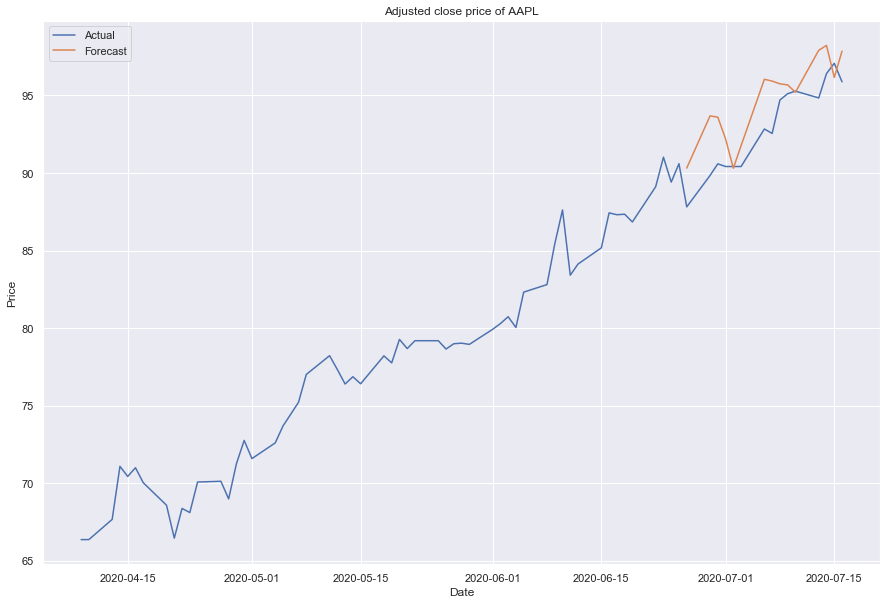

In [422]:
company='AAPL'
results=getbestVarModel(company)
appleMape=getForecastResultsandMAPE(company,results[0],results[1])

    
    

order at which model is performing best is 	 14
Mean Absolute Percentage Error is:	 3.6196366874623456


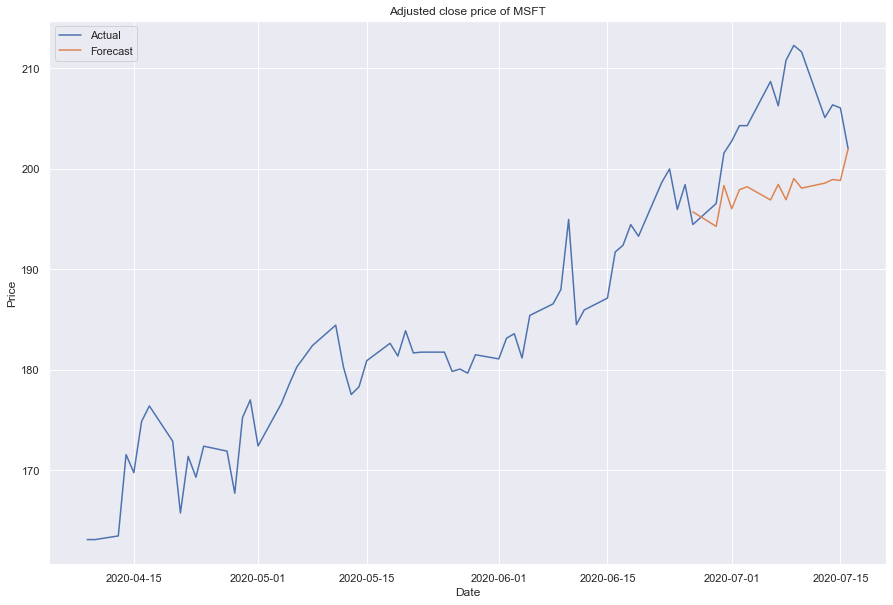

In [423]:
company='MSFT'
results=getbestVarModel(company)
appleMape=getForecastResultsandMAPE(company,results[0],results[1])


order at which model is performing best is 	 14
Mean Absolute Percentage Error is:	 8.226647255508118


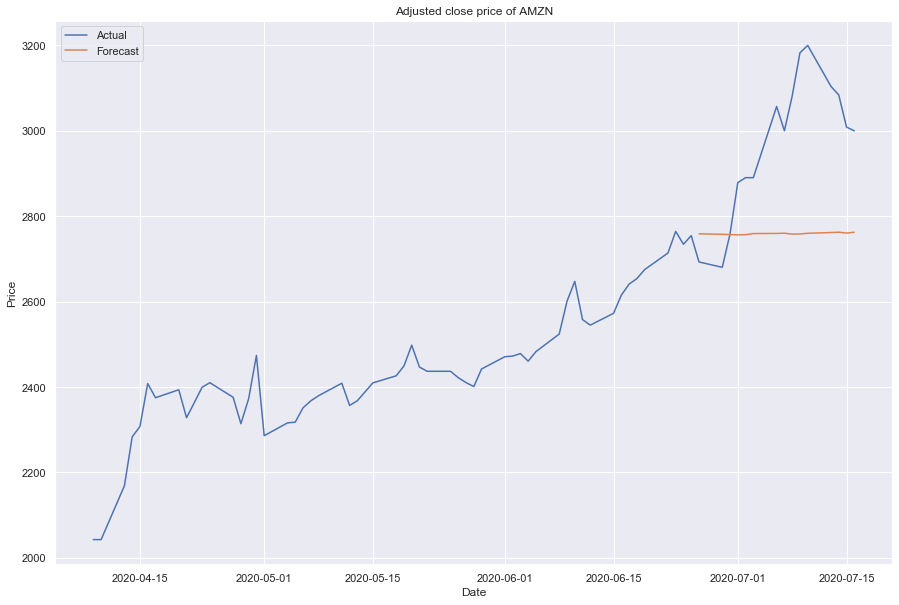

In [424]:
company='AMZN'
results=getbestVarModel(company)
appleMape=getForecastResultsandMAPE(company,results[0],results[1])


order at which model is performing best is 	 14
Mean Absolute Percentage Error is:	 29.520816279064803


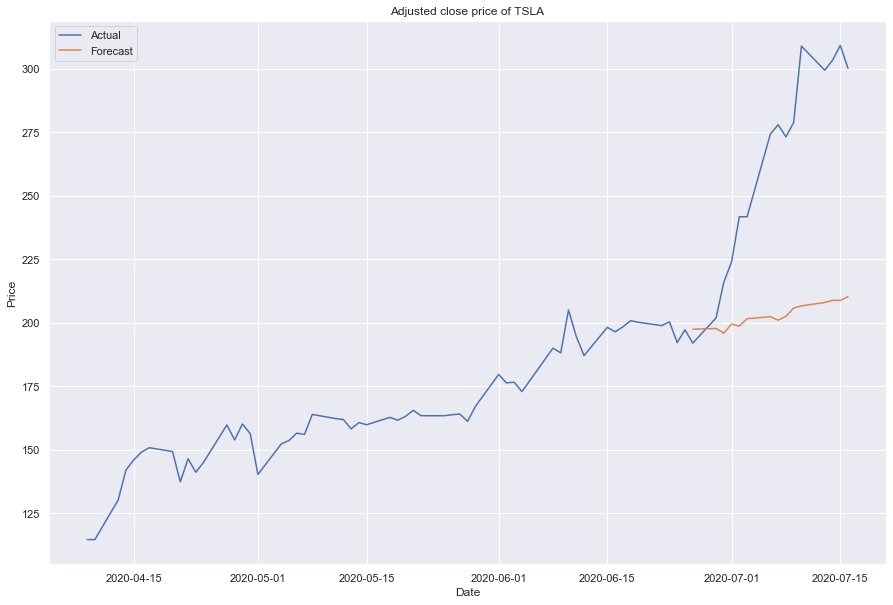

In [425]:
company='TSLA'
results=getbestVarModel(company)
appleMape=getForecastResultsandMAPE(company,results[0],results[1])



order at which model is performing best is 	 14
Mean Absolute Percentage Error is:	 4.890541158923419


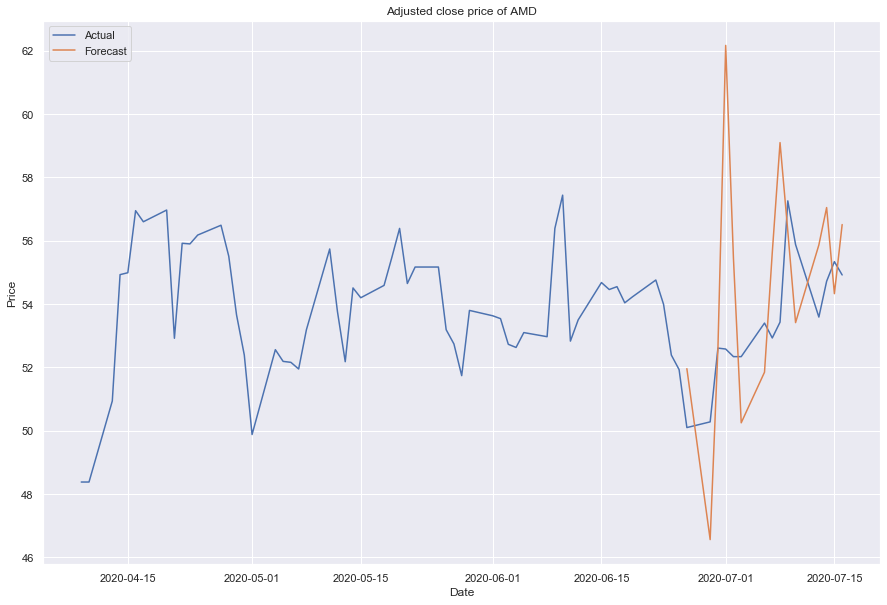

In [426]:
company='AMD'
results=getbestVarModel(company)
appleMape=getForecastResultsandMAPE(company,results[0],results[1])

